In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
dataset = pd.read_csv("diabetic_data.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
print("Number of null values:\n", dataset.shape[0] - dataset.notna().sum())

Number of null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [64]:
if dataset.notna:
    dataset = dataset.dropna()
dataset.shape

(768, 9)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset.iloc[:, -1], test_size=0.25, random_state=1)
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
247,0,165,90,33,680,52.3,0.427,23
189,5,139,80,35,160,31.6,0.361,25
139,5,105,72,29,325,36.9,0.159,28
518,13,76,60,0,0,32.8,0.180,41


> Ridge Classification

In [66]:
regclass = linear_model.RidgeClassifier(alpha=0.5)
regclass.fit(x_train, y_train)
roc_auc_score(y_test, regclass.predict(x_test))

0.732944503358077

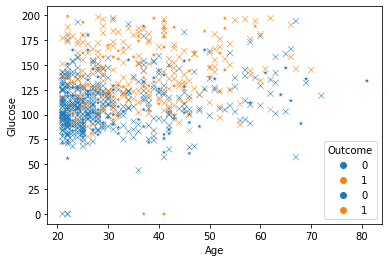

In [70]:
sns.scatterplot(x = x_test.iloc[:, 7], y = x_test.iloc[:, 1], hue = y_test, marker = "*")
sns.scatterplot(x = x_train.iloc[:, 7], y = x_train.iloc[:, 1], hue = y_train, marker = 'x')
plt.show()

In [71]:
#MSE Calculation
mse = mean_squared_error(y_test, regclass.predict(x_test))
mse

0.22395833333333334

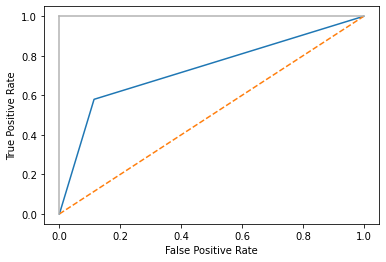

In [88]:
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, regclass.predict(x_test))
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0,0], [1,0], c = ".7")
plt.plot([1,1], c = '.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
roc_auc_score(y_test, regclass.predict(x_test))

0.732944503358077